In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test-images/000005.jpg')
img.shape

(705, 486, 3)

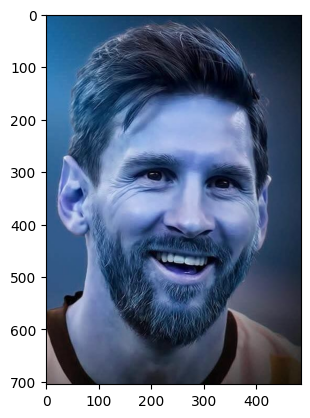

In [3]:
plt.imshow(img)

In [4]:
#converting the colorful image to the black and white
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(705, 486)

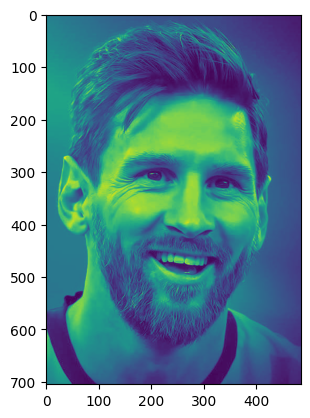

In [5]:
plt.imshow(gray)

In [6]:
gray

array([[107, 107, 106, ...,  16,  16,  16],
       [107, 106, 106, ...,  16,  16,  16],
       [106, 106, 105, ...,  17,  17,  17],
       ...,
       [104, 104, 105, ...,  23,  23,  23],
       [104, 104, 104, ...,  23,  23,  23],
       [102, 102, 102, ...,  23,  23,  23]], dtype=uint8)

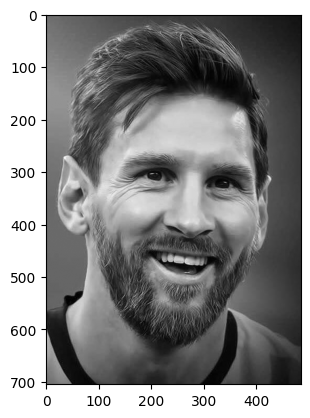

In [7]:
plt.imshow(gray,cmap='gray')

In [8]:
#detecting the face using the opencv face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 78, 174, 371, 371]], dtype=int32)

In [9]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(78), np.int32(174), np.int32(371), np.int32(371))

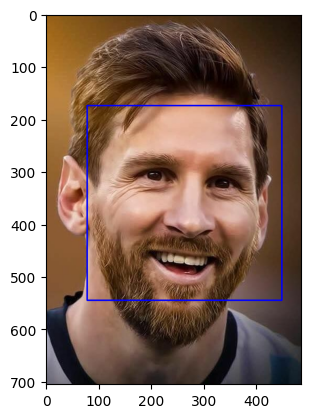

In [10]:
# And you have a face rectangle at (x, y, w, h)
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert BGR (OpenCV default) to RGB for matplotlib
img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib
plt.imshow(img_rgb)

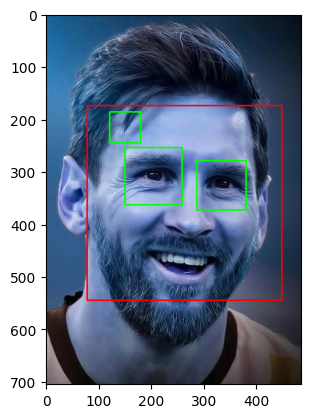

In [11]:
# Close all OpenCV windows (if any are open)
cv2.destroyAllWindows()

# Loop through all detected faces
for (x, y, w, h) in faces:
    # Draw rectangle around the face (blue box)
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Get the region of interest in grayscale for eye detection
    roi_gray = gray[y:y + h, x:x + w]
    
    # Get the corresponding region in the color image to draw eye rectangles
    roi_color = face_img[y:y + h, x:x + w]
    
    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # Loop through all detected eyes
    for (ex, ey, ew, eh) in eyes:
        # Draw rectangle around each eye (green box)
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Create a new figure for plotting
plt.figure()

# Show the final image with rectangles using grayscale colormap
plt.imshow(face_img, cmap='gray')

# Display the plot
plt.show()


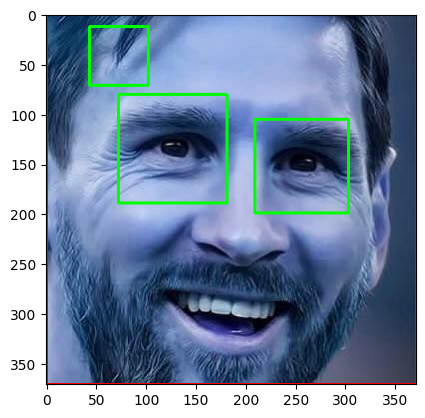

In [12]:
%matplotlib inLine
plt.imshow(roi_color,cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None  # prevents cv2.cvtColor crash
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None


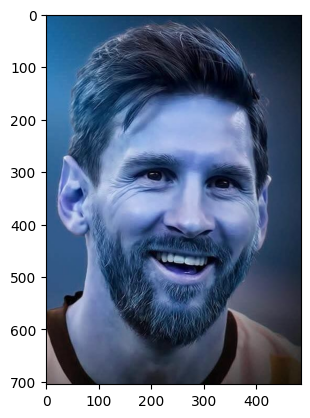

In [14]:
original_image=cv2.imread('./test-images/000005.jpg')
plt.imshow(original_image)

In [ ]:
#function to print the cropped image
def print_cropped_image(cropped_image):
    if cropped_image is not None:
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Face with 2 Eyes")
        plt.axis("off")
        plt.show()
    else:
        print("No valid face with 2 eyes detected in the image.")


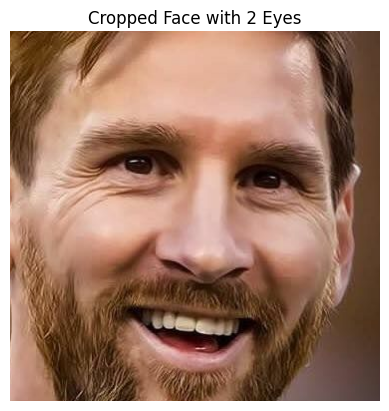

In [16]:
cropped_img = get_cropped_image_if_2_eyes('./test-images/000005.jpg')
print_cropped_image(cropped_img)

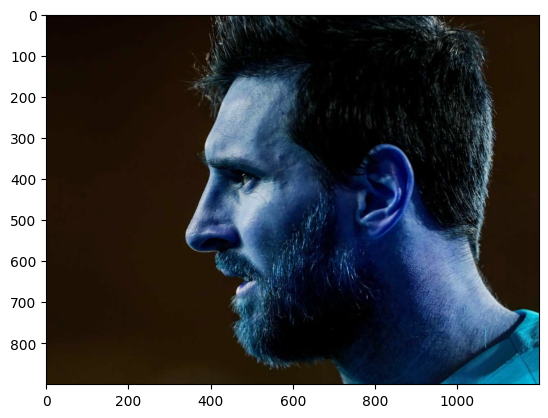

In [17]:
original_image=cv2.imread('./test-images/000013.jpg')
plt.imshow(original_image)

In [18]:
cropped_img = get_cropped_image_if_2_eyes('./test-images/000013.jpg')
print_cropped_image(cropped_img)

No valid face with 2 eyes detected in the image.


In [19]:
path_to_data="./sports_persons_dataset"
path_to_cr_data="../sports_persons_dataset/cropped"

In [20]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):#it will go through the subdirectory
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./sports_persons_dataset\\chris_gayle',
 './sports_persons_dataset\\cropped',
 './sports_persons_dataset\\messi',
 './sports_persons_dataset\\ricky_ponting',
 './sports_persons_dataset\\ronaldo',
 './sports_persons_dataset\\virat_kohli']

In [22]:
import os
import shutil

path_to_cr_data = 'sports_persons_dataset/cropped'  # Relative to current script location
print("Creating folder at:", path_to_cr_data)

# Ensure parent directories exist
os.makedirs(os.path.dirname(path_to_cr_data), exist_ok=True)

# Remove existing cropped folder if it exists
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

# Create the cropped folder
os.makedirs(path_to_cr_data, exist_ok=True)  # This creates the folder safely


Creating folder at: sports_persons_dataset/cropped


In [23]:
celebrity_file_name_dict = {}
cropped_img_dirs = []

for img_dir in img_dirs:
    if "cropped" in img_dir.lower():
        continue
    count = 1
    celebrity_name = os.path.basename(img_dir)  # handles any OS path separator

    print("Processing:", celebrity_name)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name) 
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating the folder:", cropped_folder)
                cropped_img_dirs.append(cropped_folder)

            cropped_file_name = f"{celebrity_name}_{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, roi_color)

            if celebrity_name not in celebrity_file_name_dict:
                celebrity_file_name_dict[celebrity_name] = []

            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1


Processing: chris_gayle
Generating the folder: sports_persons_dataset/cropped\chris_gayle
Processing: messi
Generating the folder: sports_persons_dataset/cropped\messi
Processing: ricky_ponting
Generating the folder: sports_persons_dataset/cropped\ricky_ponting
Processing: ronaldo
Generating the folder: sports_persons_dataset/cropped\ronaldo
Processing: virat_kohli
Generating the folder: sports_persons_dataset/cropped\virat_kohli


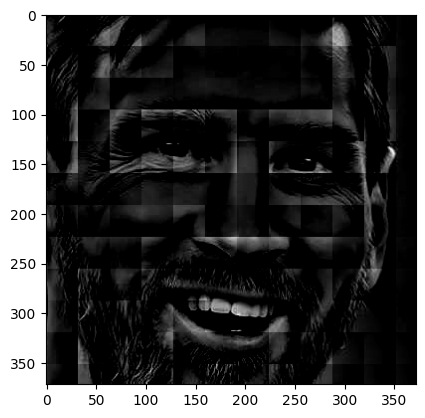

In [25]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt

#stackover flow and modifed also by GPT

def w2d(img, mode='haar', level=1):
    # Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Convert to float and normalize
    img_gray = np.float32(img_gray)
    img_gray /= 255.0

    # Compute wavelet coefficients (ensure the correct wavelet argument)
    coeffs = pywt.wavedec2(img_gray, wavelet=mode, level=level)

    # Zero out the approximation coefficients (keep only detail coefficients)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruct the image using only detail coefficients
    img_reconstructed = pywt.waverec2(coeffs_H, wavelet=mode)
    img_reconstructed *= 255
    img_reconstructed = np.uint8(np.clip(img_reconstructed, 0, 255))

    return img_reconstructed

cropped_img = get_cropped_image_if_2_eyes('./test-images/000005.jpg')
im_har = w2d(cropped_img, mode='db1', level=5)

plt.imshow(im_har, cmap='gray')



In [26]:
class_dict={}
count=0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'chris_gayle': 0,
 'messi': 1,
 'ricky_ponting': 2,
 'ronaldo': 3,
 'virat_kohli': 4}

In [27]:

X = []
y = []

# Iterate over celebrity names and their training files
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue

        # Resize raw image to (32, 32) for consistency
        scalled_raw_img = cv2.resize(img, (32, 32))

        # Apply wavelet transformation and resize to (32, 32) if needed
        im_har = w2d(img, mode='db1', level=5)
        scalled_img_har = cv2.resize(im_har, (32, 32))  # Resize wavelet image

        # Flatten both images and combine them
        scalled_raw_img = scalled_raw_img.reshape(32*32*3, 1)  # Shape: (3072, 1)
        scalled_img_har = scalled_img_har.reshape(32*32, 1)    # Shape: (1024, 1)

        # Stack the images vertically
        combined_img = np.vstack((scalled_raw_img, scalled_img_har))  # Shape: (4096, 1)

        # Append to the dataset
        X.append(combined_img)
        y.append(class_dict[celebrity_name])




In [28]:
len(X[0])

4096

In [29]:
X[0]

array([[225],
       [223],
       [222],
       ...,
       [  0],
       [  0],
       [  5]], dtype=uint8)

In [30]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(52, 4096)

In [75]:
#now we will  moving towards the model training or model building 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='linear',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6153846153846154

In [77]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         2
           3       1.00      0.57      0.73         7
           4       0.00      0.00      0.00         0

    accuracy                           0.62        13
   macro avg       0.47      0.51      0.47        13
weighted avg       0.74      0.62      0.64        13



C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [78]:
from sklearn.model_selection import GridSearchCV

In [83]:

model_param={
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}


In [84]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_param.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({  
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_  


df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ashis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ashis\AppData\Local\Programs\Python\P

In [85]:
df

,model,best_score,best_params
0,svm,0.621429,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.517857,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.621429,{'logisticregression__C': 1}


In [88]:
best_estimators['svm'].score(X_test,y_test)

0.6153846153846154

In [90]:
best_estimators['random_forest'].score(X_test,y_test)

0.46153846153846156

In [91]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6923076923076923

In [94]:
best_clf=best_estimators['svm']

In [95]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 1, 4, 1],
       [0, 0, 0, 0, 0]])

Text(95.72222222222221, 0.5, 'Truth')

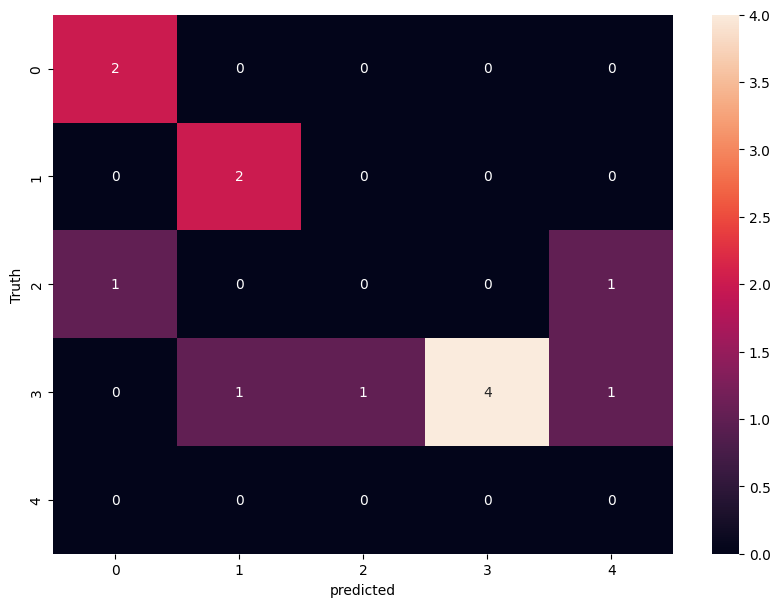

In [96]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')


In [97]:
class_dict

{'chris_gayle': 0,
 'messi': 1,
 'ricky_ponting': 2,
 'ronaldo': 3,
 'virat_kohli': 4}